In [200]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [201]:
train_df = pd.read_csv("ad_org_train.csv")
test_df = pd.read_csv("ad_org_test.csv")
train_df.tail(20)
train_df = train_df[train_df.adview <=200]  # removing outliers

In [202]:
train_df.apply(lambda x: len(x.unique()))

vidid        14124
adview         178
views        13784
likes         4662
dislikes      1508
comment       1967
published     2379
duration      3113
category         8
dtype: int64

In [203]:
train_df = train_df[train_df.likes != 'F']
train_df = train_df[train_df.views != 'F']
train_df = train_df[train_df.comment != 'F']

In [204]:
test_df = test_df[test_df.likes != 'F']
test_df = test_df[test_df.views != 'F']
test_df = test_df[test_df.comment != 'F']

In [205]:
print (train_df.dtypes)

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


In [206]:
train_ID = train_df['vidid']
test_ID = test_df['vidid']
train_df.drop("vidid", axis = 1, inplace = True)
test_df.drop("vidid", axis = 1, inplace = True)

In [207]:
n_train = train_df.shape[0]
n_test = test_df.shape[0]

adviews_train = train_df.adview.values

combined_data = pd.concat((train_df, test_df)).reset_index(drop=True)

combined_data.drop(['adview'], axis=1, inplace=True)
combined_data.shape

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(22340, 7)

In [208]:
combined_data[["views", "likes", "dislikes", "comment"]] = combined_data[["views", "likes", "dislikes", "comment"]].apply(pd.to_numeric)

In [209]:
def time_in_sec(time):
    secs = 0
    time = time[2:]
    time_arr = re.split("[HMS]",time)
    time_arr = time_arr[:-1]
    if "H" in time:
        secs += 3600*int(time_arr[0])
        if "M" in time:
            secs += 60*int(time_arr[1])
            if "S" in time:
                secs += int(time_arr[2])
                return secs
        elif "S" in time:
                secs += int(time_arr[1])
        return secs
    elif "M" in time:
        secs += 60*int(time_arr[0])
        if "S" in time:
            secs += int(time_arr[1])
        return secs
    elif "S" in time:
            secs += int(time_arr[0])
            return secs
    return secs

In [210]:
combined_data["duration"] = combined_data["duration"].apply(lambda x: int(time_in_sec(x)))

In [211]:
from datetime import date
def days_passed(d):
    d = d.split("-")
    d1 = date(int(d[0]),int(d[1]),int(d[2]))
    d0 = date(2017,6,30)
    return (d0-d1).days

In [212]:
combined_data["published"] = combined_data["published"].apply(lambda x: int(days_passed(x)))
print (days_passed("2009-3-25"))

3019


In [213]:
combined_data.head()

,category,comment,dislikes,duration,likes,published,views
0,F,1095,363,457,8523,289,1031602
1,D,6,2,570,56,272,1707
2,C,2,0,136,25,363,2023
3,H,153,161,262,777,338,620860
4,D,0,0,31,1,366,666


In [214]:
combined_data.describe()

,comment,dislikes,duration,likes,published,views
count,22340.00000,22340.000000,22340.000000,22340.000000,22340.000000,2.234000e+04
mean,438.50564,256.737019,1073.446464,2828.521576,944.125067,7.214997e+05
std,1774.10083,1009.576382,2414.810636,9140.509646,640.057171,3.021669e+06
min,0.00000,0.000000,0.000000,0.000000,67.000000,2.700000e+01
25%,8.00000,8.000000,190.000000,94.000000,399.000000,3.402050e+04
50%,48.00000,40.000000,334.000000,465.000000,770.000000,1.657370e+05
75%,233.00000,170.000000,730.000000,1918.000000,1338.000000,6.003565e+05
max,85250.00000,49449.000000,42317.000000,320072.000000,4267.000000,2.251478e+08


In [215]:
train_data = combined_data[:n_train]
test_data = combined_data[n_train:]
train_data['adview'] = adviews_train

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Distribution of adview')

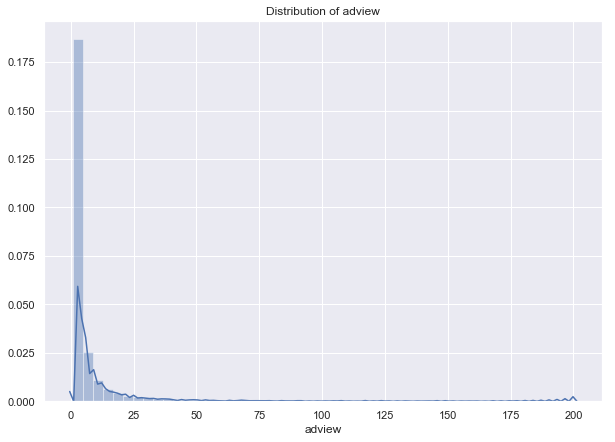

In [216]:
target = train_data.adview
plt.figure(figsize=(10,7))
sns.distplot(target)
plt.title('Distribution of adview')

Text(0.5,0,'log(adview)')

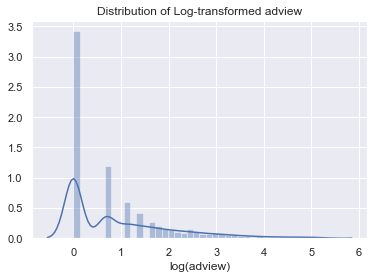

In [217]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed adview')
plt.xlabel('log(adview)')

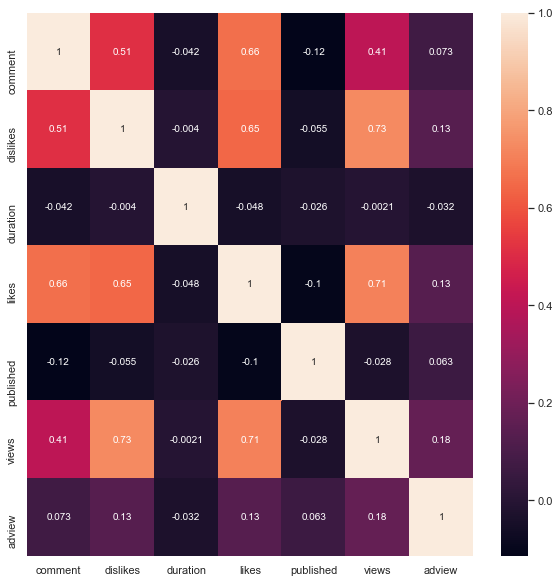

In [218]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), color = "k", annot=True)

C:\Users\suraj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


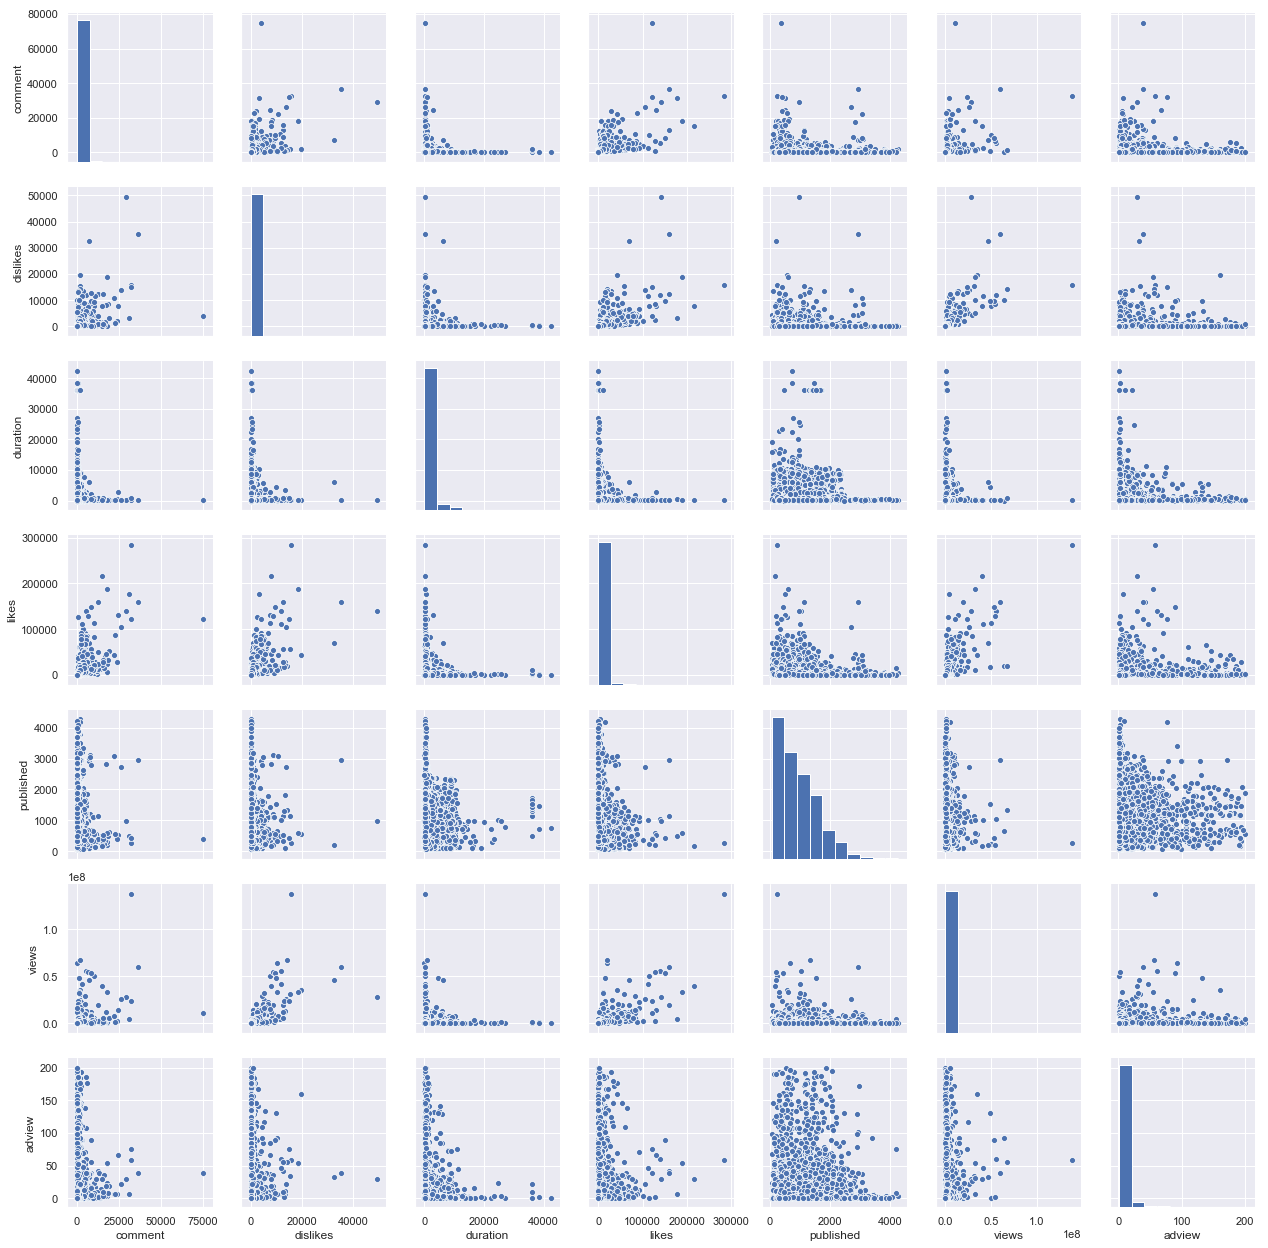

In [219]:
sns.set()
sns.pairplot(train_data, size = 2.5)

Text(0,0.5,'adview')

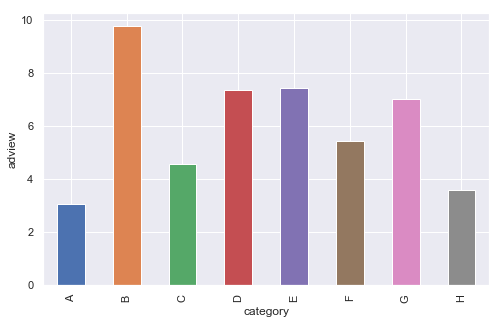

In [220]:
plt.figure(figsize=(8,5))
train_data.groupby('category')['adview'].mean().plot.bar()
plt.ylabel("adview")

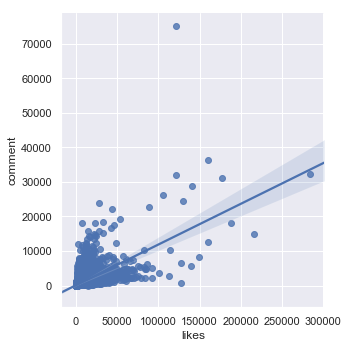

In [221]:
sns.lmplot(x="likes", y="comment", data=train_data)

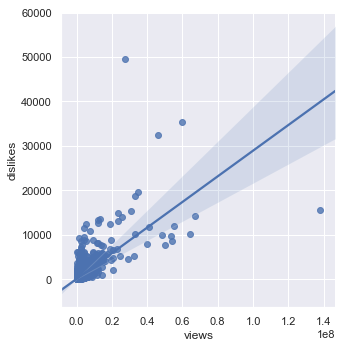

In [222]:
sns.lmplot(x="views", y="dislikes", data=train_data)

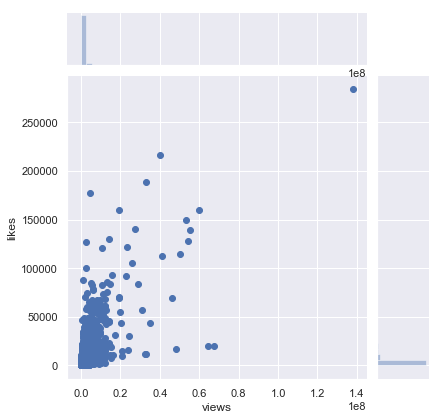

In [223]:
sns.jointplot("views","likes", train_data)

In [224]:
combined_data = pd.get_dummies(combined_data)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22340 entries, 0 to 22339
Data columns (total 14 columns):
comment       22340 non-null int64
dislikes      22340 non-null int64
duration      22340 non-null int64
likes         22340 non-null int64
published     22340 non-null int64
views         22340 non-null int64
category_A    22340 non-null uint8
category_B    22340 non-null uint8
category_C    22340 non-null uint8
category_D    22340 non-null uint8
category_E    22340 non-null uint8
category_F    22340 non-null uint8
category_G    22340 non-null uint8
category_H    22340 non-null uint8
dtypes: int64(6), uint8(8)
memory usage: 1.2 MB


In [225]:
data_train = combined_data[:n_train]
data_test = combined_data[n_train:]

In [226]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb

In [227]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(data_train, adviews_train, test_size = 0.25, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data_test = scaler.transform(data_test)

In [228]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
#print(np.sqrt(mean_squared_error(y_test,pred)))
adview_test_data_LR = LR.predict(data_test)
pred_test = LR.predict(data_test)
print(r2_score(y_test, pred))

0.002121696274217544


In [229]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))
adview_test_data_model = model.predict(data_test)
pred_test_xgb = model.predict(data_test)
print(r2_score(y_test, pred))

16.26259922244608
0.08832969753292819


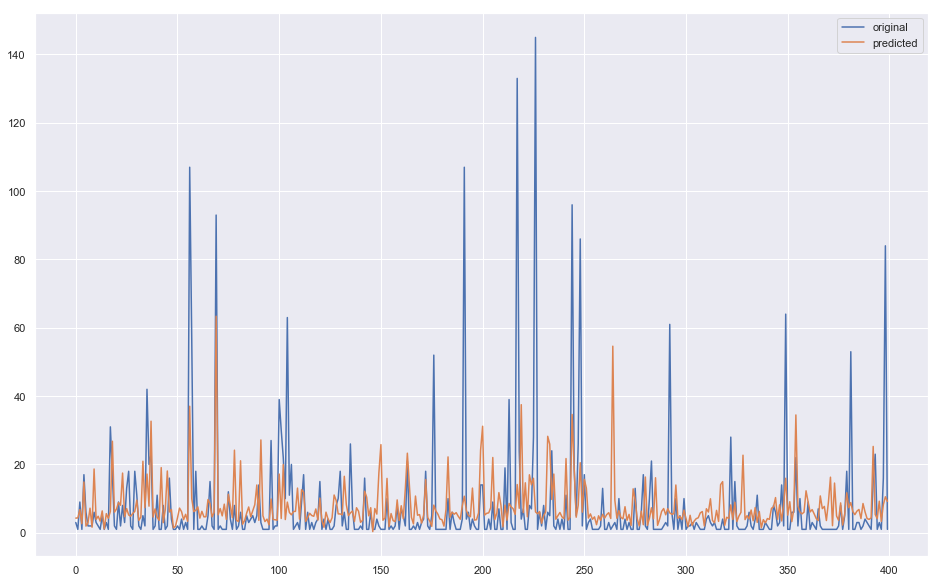

In [230]:
plt.figure(figsize=(16,10))
plt.plot(range(400),y_test[:400],label="original")
plt.plot(range(400),pred[:400],label="predicted")
plt.legend(loc='best')
plt.show()

In [231]:
GBR=GradientBoostingRegressor(n_estimators=1500,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
GBR.fit(X_train,y_train)
pred_GBR=GBR.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_GBR)))
adview_test_data_GBR = GBR.predict(data_test)
pred_test_GBR = GBR.predict(data_test)
print(r2_score(y_test, pred_GBR))

16.587182065251096
0.051574739489988586


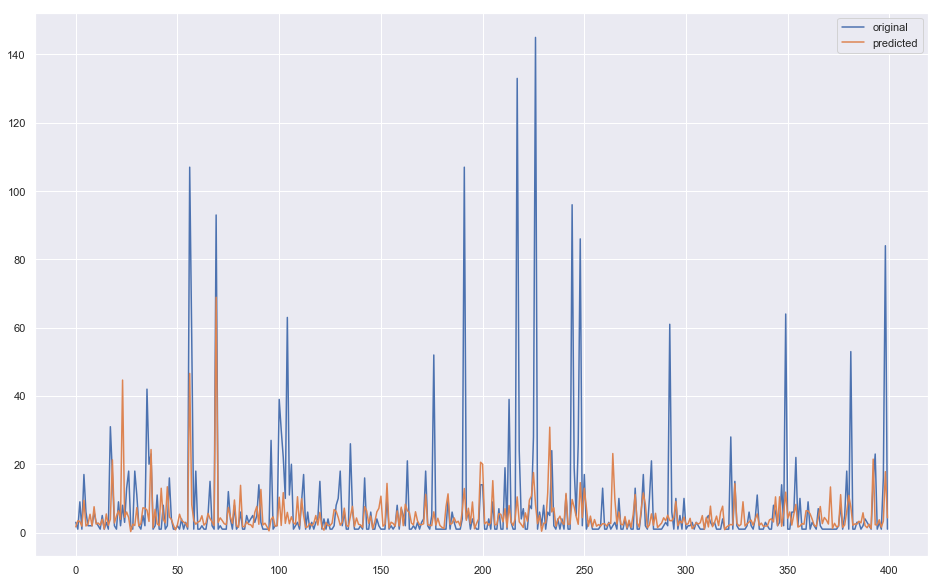

In [232]:
plt.figure(figsize=(16,10))
plt.plot(range(400),y_test[:400],label="original")
plt.plot(range(400),pred_GBR[:400],label="predicted")
plt.legend(loc='best')
plt.show()

In [233]:
DT = DecisionTreeRegressor(max_depth=2)
DT.fit(X_train, y_train)
pred_DT = DT.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_DT)))
print(r2_score(y_test, pred_DT))

16.537694766280666
0.057225487125270647


In [234]:
sub = pd.DataFrame()
sub['vidid'] = test_ID
sub['adview'] = (pred_test_xgb + pred_test_GBR)//2
sub.to_csv('submission__adviews.csv', index=False)